In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(12, 6)})

# for custom notebook formatting.
from IPython.core.display import HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
HTML(open('../custom.css').read())


<br><br><br>

## Natural Language Processing
### :::: Logistic Regression ::::


<br><br><br><br><br><br>

Classification problem notation:


- $\vec{x} \in \mathcal{X}$ &nbsp;&nbsp;&nbsp;&nbsp; *instance*, *example*, *input*
  - e.g., an email, a sentence
  
- $y \in \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *target*, *class*, *label*, *output*
  - e.g., $y=1$: spam ; $y=-1$: not spam
  
- $f: \mathcal{X} \mapsto \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *hypothesis*, *learner*, *model*, *classifier*
  - e.g., if $x$ contain the word *free*, $y$ is $1$.
  
  
Main quantity of interest: $p(y \mid \vec{x})$,  
the probability of a class label $y$ given a feature vector $\vec{x}$.

### Supervised classification

We are given **training data** $D = \{(\vec{x}_1, y_1), \ldots, (\vec{x}_n, y_n)\}$

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1| 
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|

How to classify a new instance?  
 "free money" -> $\{1,1\}$


## Recall Naive bayes

Using Bayes' rule, we can rewrite $p(y \mid \vec{x})$ as:

$$
p(y \mid \vec{x}) = \frac{p(y)p(\vec{x} \mid y)}{p(\vec{x})} = \frac{p(y)\prod_j p(x_{ij}|y)}{p(\vec{x})}
$$
where, in Bernoulli approach:

$$p(x_{k}=1|y=1) = \frac{\sum_{(x_i, y_i) \in D}1[x_{ik}=1 \wedge y_i=1]}{\sum_{(x_i, y_i) \in D} 1[y_i=1]}$$
i.e., what proportion of documents where $y=1$ have term $k$?

and in Multinomial approach:

$$
p(x_{k}=1 | y_i = 1) = \frac{T_{1k}}{\sum_j T_{1j}}
$$
where $T_{ck}$ is the number occurrences of term $k$ in documents where $y=c$.
- E.g., count all the occurrences of the term $k$ in documents where the true class label is $c$.    


Naive Bayes takes an indirect route to compute $p(y \mid \vec{x})$ by inverting the conditional to $p(\vec{x} \mid y)$.

<u> Can we directly compute</u> $p(y \mid \vec{x})$?

<br><br><br>

#### Function estimation

$p(y \mid \vec{x})$ is just a function $f(y, \vec{x})$ that satisfies three criteria:
1. $0 \le f(y, \vec{x}) \le 1$  : values are between 0 and 1
2. $\sum_{y_i} f(y_i, \vec{x}) = 1$  : values sum to one for all possible classes
3. If $f(y_i, \vec{x}) > f(y_j, \vec{x})$, then it is more likely that $\vec{x}$ is of class $i$ than of class $j$


How do we ensure criterion 3?
<br><br><br>

## Classification as a type of regression

Assume our function has some real-valued parameter vector $\vec{\theta} = \{\theta_1 \ldots \theta_k\}$

For simplicity, let's assume there are $k$ terms in our vocabulary, and that each $\theta$ is associated with a single term.

Further, let's assume binary classification, where $y \in \{-1, 1\}$.

One simple way to construct a function is as follows:

$f(\vec{x}, \vec{\theta}) = \sum_j x_j \theta_j = \vec{x} \cdot \vec{\theta}$  
where  
- $x_i$ is the frequency of term $j$ in this document.
- $\vec{x} \cdot \vec{\theta}$ is the dot product between vectors $\vec{x}$ and $\vec{\theta}$

To classify a document $\vec{x}$, we can then apply the rule:
- If $f(\vec{x}, \vec{\theta}) \ge 0$
  - output $1$
- else output $-1$

<br><br>
Thus,
- If $\theta_j >> 0$, then term $j$ is associated with the positive class.  
- If $\theta_j << 0$, then term $j$ is associated with the negative class.
<br><br><br>



In [88]:
from numpy import array as npa

def f(x, theta):
    return np.dot(x.T, theta)

x = npa([1,2,3])  # term0 appears 1 time, term1 appears 2 times...
theta = npa([-1, -1, 5])  # third term is predictive of positive class
f(x, theta)

12

In [89]:
# a negative example.
x2 = npa([10, 10, 0])
f(x2, theta)

-20

This can be understood as a type of regression task. To fit a regression function, we need to pick a model and an error function, then optimize the model parameters somehow. In machine learning, this is most commonly done with the gradient descent algorithm:

### Gradient descent recipe

1.  Select a model type (e.g., linear, polynomial, etc)

2.  Select an <span>**error function**</span> that, when minimized, results in a good setting of the model parameters.

3.  Analytically determine the gradient of the error function with respect to the model parameters.

4.  Iteratively change the parameters by a small amount in the direction of the gradient until the (near) minimum of the error function is found.

<br><br><br>


## RSS

Given a labeled dataset $D = \{(y_1, \vec{x}_1) \ldots (y_n, \vec{x}_n)\}$, an intuitive error function is called  
*Residual Sum of Squares*

$$
RSS(\vec{\theta}, D) = \frac{1}{2}\sum_{i=1}^{|D|}(y_i - f(\vec{x}_i, \vec{\theta}))^2
$$



In [90]:
def rss(theta, D):
    error = 0
    predictions = []  # for debugging
    for xi, yi in D:
        prediction = f(xi, theta)
        errori = (yi - prediction)**2
        error += errori
        predictions.append((xi, yi, prediction, errori))
    display(pd.DataFrame(predictions, columns=['x', 'y', 'prediction', 'error']))
    return error / 2

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1| 
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|


In [91]:
D = [
    (npa([0,0]), -1),
    (npa([1,0]), 1),
    (npa([1,1]), -1),
    (npa([1,1]), -1),
    (npa([1,0]), -1),
    (npa([1,1]), 1),
    (npa([0,0]), 1),
    (npa([0,1]), -1),
]
theta = npa([0,0])
print('\nRSS=%g' % rss(theta, D))

,x,y,prediction,error
0,"[0, 0]",-1,0,1
1,"[1, 0]",1,0,1
2,"[1, 1]",-1,0,1
3,"[1, 1]",-1,0,1
4,"[1, 0]",-1,0,1
5,"[1, 1]",1,0,1
6,"[0, 0]",1,0,1
7,"[0, 1]",-1,0,1



RSS=4


In [92]:
theta = npa([1,1])
print('\nRSS=%g' % rss(theta, D))

,x,y,prediction,error
0,"[0, 0]",-1,0,1
1,"[1, 0]",1,1,0
2,"[1, 1]",-1,2,9
3,"[1, 1]",-1,2,9
4,"[1, 0]",-1,1,4
5,"[1, 1]",1,2,1
6,"[0, 0]",1,0,1
7,"[0, 1]",-1,1,4



RSS=14.5


In [93]:
theta = npa([0.5,-1])
print('\nRSS=%g' % rss(theta, D))

,x,y,prediction,error
0,"[0, 0]",-1,0.0,1.00
1,"[1, 0]",1,0.5,0.25
2,"[1, 1]",-1,-0.5,0.25
3,"[1, 1]",-1,-0.5,0.25
4,"[1, 0]",-1,0.5,2.25
5,"[1, 1]",1,-0.5,2.25
6,"[0, 0]",1,0.0,1.00
7,"[0, 1]",-1,-1.0,0.00



RSS=3.625


The optimization problem is then to pick optimal $\vec{\theta}^*$ to satisfy:

$$ \vec{\theta}^* = \mathrm{argmin}_\vec{\theta} \hspace{.4cm} RSS(\vec{\theta}, D)$$

<br><br>

**Solution:** Gradient descent

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/ball.png">


while not converged:
1. Compute gradient $\nabla_\vec{\theta}$ of $\vec{\theta}$ w.r.t. RSS
2. Change $\vec{\theta}$ in direction of $\nabla_\vec{\theta}$


$$\nabla_\vec{\theta} = \{\frac{\partial RSS(f, D)}{\partial \theta_1} \ldots \frac{\partial RSS(f, D)}{\partial \theta_v}\}$$

\begin{aligned}
\frac{\partial RSS(f, D)}{\partial \theta_j} &=& \frac{\partial}{\partial \theta_j} \frac{1}{2}\sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)^2\\
&=& \sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)\frac{\partial}{\partial \theta_j} (y_i - \theta \cdot \vec{x}_i)\\
&=& \sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)(-x_{ij})\end{aligned}

<br><br>
**To update parameters:**

$$\vec{\theta}_j^{t+1} = \vec{\theta}_j^{t} + \eta \sum_{i=1}^{|D|}(y_i - \vec{\theta}^t \cdot \vec{x}_i)x_{ij}$$

$\eta$ = "learning rate", to prevent "jumping over" minimum

<br>

What is this update doing?
<br><br><br>
- Compute error on $i$th example
- Adjust parameter $j$ to reduce that error, proportional to how important feature $j$ is for example $i$

In [94]:
def gradient(theta, D):
    result = np.zeros(len(theta), dtype=np.float64)
    for xi, yi in D:
        error = yi - f(xi, theta)
        for j, xij in enumerate(xi):
            result[j] += error * -xij
    return result

In [95]:
gradient(npa([0,0]), D)

array([1., 2.])

In [96]:
rss(npa([0, 0]), D)

,x,y,prediction,error
0,"[0, 0]",-1,0,1
1,"[1, 0]",1,0,1
2,"[1, 1]",-1,0,1
3,"[1, 1]",-1,0,1
4,"[1, 0]",-1,0,1
5,"[1, 1]",1,0,1
6,"[0, 0]",1,0,1
7,"[0, 1]",-1,0,1


4.0

In [31]:
rss(npa([-1, -2]), D)

,x,y,prediction,error
0,"[0, 0]",-1,0,1
1,"[1, 0]",1,-1,4
2,"[1, 1]",-1,-3,4
3,"[1, 1]",-1,-3,4
4,"[1, 0]",-1,-1,0
5,"[1, 1]",1,-3,16
6,"[0, 0]",1,0,1
7,"[0, 1]",-1,-2,1


15.5

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

def gradient_descent(gradient_fn, error_fn, theta,
                     learning_rate, D, tolerance, max_iters):
    errori = error_fn(theta, D)
    iters = 0
    trace = [] # for debugging
    while True:
        iters += 1
        print('\n\niteration %d' % iters)
        grad = gradient_fn(theta, D)
        trace.append((theta.copy(), grad, errori))
        print('gradient=', grad)
        theta -= learning_rate * grad  # UPDATE!
        newerror = error_fn(theta, D)
        print('old error=%g   new error=%g  theta=%s\n\n' %
              (errori, newerror, str(theta)))
        error_diff = errori - newerror
        # stopping criteria
        if error_diff < 0:
            print('error got worse')
            break
        elif errori - newerror < tolerance:
            print('error change is too small')
            break
        elif iters >= max_iters:
            print('max iterations reached')
            break
        else:
            errori = newerror
    trace = pd.DataFrame(trace, columns=['theta', 'gradient', 'error'])
    display(trace)
    plt.plot(trace.error, 'bo-')
    plt.xlabel('iteration')
    plt.ylabel('error')
    return theta

,x,y,prediction,error
0,"[0, 0]",-1,0.0,1.0
1,"[1, 0]",1,1.0,0.0
2,"[1, 1]",-1,2.0,9.0
3,"[1, 1]",-1,2.0,9.0
4,"[1, 0]",-1,1.0,4.0
5,"[1, 1]",1,2.0,1.0
6,"[0, 0]",1,0.0,1.0
7,"[0, 1]",-1,1.0,4.0




iteration 1
gradient= [9. 9.]


,x,y,prediction,error
0,"[0, 0]",-1,0.0,1.00
1,"[1, 0]",1,-0.8,3.24
2,"[1, 1]",-1,-1.6,0.36
3,"[1, 1]",-1,-1.6,0.36
4,"[1, 0]",-1,-0.8,0.04
5,"[1, 1]",1,-1.6,6.76
6,"[0, 0]",1,0.0,1.00
7,"[0, 1]",-1,-0.8,0.04


old error=14.5   new error=6.4  theta=[-0.8 -0.8]




iteration 2
gradient= [-5.4 -3.6]


,x,y,prediction,error
0,"[0, 0]",-1,0.00,1.0000
1,"[1, 0]",1,0.28,0.5184
2,"[1, 1]",-1,0.20,1.4400
3,"[1, 1]",-1,0.20,1.4400
4,"[1, 0]",-1,0.28,1.6384
5,"[1, 1]",1,0.20,0.6400
6,"[0, 0]",1,0.00,1.0000
7,"[0, 1]",-1,-0.08,0.8464


old error=6.4   new error=4.2616  theta=[ 0.28 -0.08]




iteration 3
gradient= [2.16 2.52]


,x,y,prediction,error
0,"[0, 0]",-1,0.000,1.000000
1,"[1, 0]",1,-0.152,1.327104
2,"[1, 1]",-1,-0.736,0.069696
3,"[1, 1]",-1,-0.736,0.069696
4,"[1, 0]",-1,-0.152,0.719104
5,"[1, 1]",1,-0.736,3.013696
6,"[0, 0]",1,0.000,1.000000
7,"[0, 1]",-1,-0.584,0.173056


old error=4.2616   new error=3.68618  theta=[-0.152 -0.584]




iteration 4
gradient= [-1.512 -0.792]


,x,y,prediction,error
0,"[0, 0]",-1,0.0000,1.000000
1,"[1, 0]",1,0.1504,0.721820
2,"[1, 1]",-1,-0.2752,0.525335
3,"[1, 1]",-1,-0.2752,0.525335
4,"[1, 0]",-1,0.1504,1.323420
5,"[1, 1]",1,-0.2752,1.626135
6,"[0, 0]",1,0.0000,1.000000
7,"[0, 1]",-1,-0.4256,0.329935


old error=3.68618   new error=3.52599  theta=[ 0.1504 -0.4256]




iteration 5
gradient= [0.4752 0.7488]


,x,y,prediction,error
0,"[0, 0]",-1,0.00000,1.000000
1,"[1, 0]",1,0.05536,0.892345
2,"[1, 1]",-1,-0.52000,0.230400
3,"[1, 1]",-1,-0.52000,0.230400
4,"[1, 0]",-1,0.05536,1.113785
5,"[1, 1]",1,-0.52000,2.310400
6,"[0, 0]",1,0.00000,1.000000
7,"[0, 1]",-1,-0.57536,0.180319


old error=3.52599   new error=3.47882  theta=[ 0.05536 -0.57536]




iteration 6
gradient= [-0.44928 -0.13536]


,x,y,prediction,error
0,"[0, 0]",-1,0.000000,1.000000
1,"[1, 0]",1,0.145216,0.730656
2,"[1, 1]",-1,-0.403072,0.356323
3,"[1, 1]",-1,-0.403072,0.356323
4,"[1, 0]",-1,0.145216,1.311520
5,"[1, 1]",1,-0.403072,1.968611
6,"[0, 0]",1,0.000000,1.000000
7,"[0, 1]",-1,-0.548288,0.204044


old error=3.47882   new error=3.46374  theta=[ 0.145216 -0.548288]




iteration 7
gradient= [0.081216 0.242496]


,x,y,prediction,error
0,"[0, 0]",-1,0.000000,1.000000
1,"[1, 0]",1,0.128973,0.758688
2,"[1, 1]",-1,-0.467814,0.283222
3,"[1, 1]",-1,-0.467814,0.283222
4,"[1, 0]",-1,0.128973,1.274580
5,"[1, 1]",1,-0.467814,2.154479
6,"[0, 0]",1,0.000000,1.000000
7,"[0, 1]",-1,-0.596787,0.162581


old error=3.46374   new error=3.45839  theta=[ 0.1289728 -0.5967872]


error change is too small


,theta,gradient,error
0,"[1.0, 1.0]","[9.0, 9.0]",14.500000
1,"[-0.8, -0.8]","[-5.4, -3.6000000000000005]",6.400000
2,"[0.28, -0.07999999999999985]","[2.1600000000000006, 2.5200000000000005]",4.261600
3,"[-0.15200000000000014, -0.584]","[-1.5120000000000007, -0.7920000000000004]",3.686176
4,"[0.15040000000000003, -0.42559999999999987]","[0.4752000000000005, 0.7488000000000005]",3.525990
5,"[0.05535999999999992, -0.57536]","[-0.44928000000000035, -0.13536000000000004]",3.478824
6,"[0.145216, -0.548288]","[0.08121600000000018, 0.24249600000000016]",3.463738


array([ 0.1289728, -0.5967872])

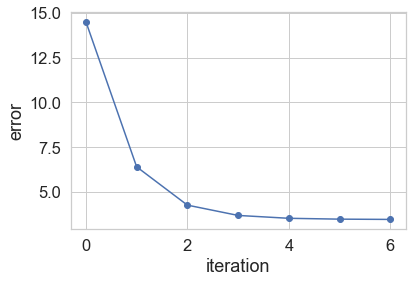

In [98]:
theta = npa([1.,1.])
gradient_descent(gradient, rss, theta, .2, D, .01, 20)

## From regression to classification

**Does our error function make sense?**


iteration 1  
truth=-1  prediction=0 error=1  
truth=1  prediction=-0.8 error=3.24  
**truth=-1  prediction=-1.6 error=0.36**

<br><br>

The above assumes that the output variable $y_i$ is a real number. Thus, this is a model of <span>**regression**</span>.  

When $y$ is disrete, the problem is one of <span>**classification**</span>.  

<br>
Recall our three criterion for the function:

1. $0 \le f(y, \vec{x}) \le 1$  : values are between 0 and 1
2. $\sum_{y_i} f(y_i, \vec{x}) = 1$  : values sum to one for all possible classes
3. If $f(y_i, \vec{x}) > f(y_j, \vec{x})$, then it is more likely that $\vec{x}$ is of class $i$ than of class $j$

<br>
We have satisfied 3 (mostly), but not 1 or 2.

<br><br>

The way around this is to change our model. Rather than regression, we need classification. We can do this by passing the dot product $x_i \cdot \theta$ through a “squashing function” (the **logistic function**) that ensures its value is always between 0 and 1: 

$$f(\vec{x}_i, \vec{\theta}) = \frac{1}{1 + e^{-\vec{x}_i \cdot \vec{\theta}}}$$

This is called **logistic regression.**


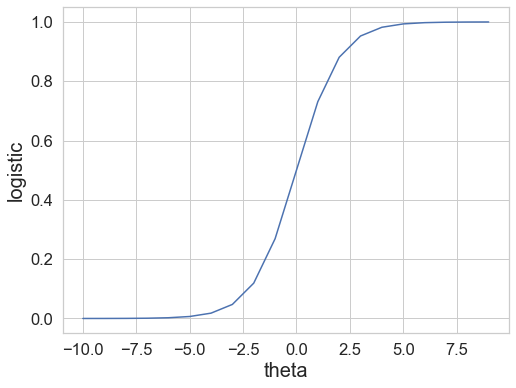

In [99]:
from math import exp
def logistic(x, theta):
    # p(y=1|x)
    return 1 / (1 + exp(-f(x, theta)))
    
x = npa([1])

plt.figure(figsize=(8,6))
plt.plot(range(-10, 10), [logistic(x, theta) for theta in range(-10, 10)])
plt.xlabel('theta', size=20)
plt.ylabel('logistic', size=20)
plt.show()

Because $f(x_i, \vec{\theta})$ will always be between 0 and 1, and will sum to one for both classes, we have the right to call this a <span>**probability**</span> $p(y_i=1|\vec{x}_i)$.  

$$f(\vec{x}_i) = p(y_i=1|\vec{x}_i) = \frac{1}{1 + e^{-\vec{x}_i \cdot \vec{\theta}}}$$

and, for binary classification, the probability of a negative example:

$$
p(y_i=-1|\vec{x}_i) = 1 - p(y_i=1|\vec{x}_i)
$$

with some algebra, it turns out that:

$$
p(y_i=-1|\vec{x}_i) = \frac{1}{1 + e^{\vec{x}_i \cdot \vec{\theta}}}
$$

(note we no longer have negative sign in front of dot product)


Because of this, if $y_i \in \{-1, 1\}$, we can write:

$$
p(y_i|\vec{x}_i) =  \frac{1}{1 + e^{-y_i \vec{x}_i \cdot \vec{\theta}}}
$$

<br><br>

**What is a good error function for logistic regression?**

We can now rephrase our learning objective as maximizing the <span>*joint probability of the true labels for all training instances.*</span>  

Since we assume each instance is drawn independently, we can write this joint probability as a product of individual probabilities: 

$$p(y_1 \ldots y_n|\vec{x}_1 \ldots \vec{x}_n) = p(y_1|\vec{x}_n) * p(y_2|\vec{x}_2) * \ldots * p(y_n|\vec{x}_n) = \prod_{i=1}^{n}p(y_i|\vec{x}_i)$$

Because we’re used to minimizing functions using gradient descent, rather than maximizing the probability, we can instead minimize the negative probability. This is our new error function: 

$$
E(D, h) = - \prod_{i=1}^{n}p(y_i|x_i)
$$

Note that this is very similar to RSS, but by using probabilities, we ensure that the output for each instance is always between 0 and 1.

<br><br>

Following our learning recipe, our next step is to minimize $E(D,h)$ using gradient descent.  

Computing the gradient of $E(D,h)$ in its current form is rather hard. So, we can simply transform it to something that’s easier to take the gradient of: 

$$E(D,h) = - \ln \prod_{i=1}^n  p(y_i|\vec{x}_i) = -\sum_i \ln p(y_i|\vec{x}_i)$$

This is called the <span>**negative log likelihood**</span>. It turns out that minimizing $f(x)$ or $\ln f(x)$ results in the same answer, so we can make this transformation without affecting our final solution.


In [100]:
from math import log

def nll(theta, D):
    total = 0
    predictions = [] # for debugging
    for xi, yi in D:
        pred = logistic(xi, theta) if yi==1 else 1-logistic(xi, theta)
        total += log(pred)
        predictions.append((xi, yi, pred, 1-pred))
    display(pd.DataFrame(predictions, columns=['x', 'y', 'prediction', 'error']))        
    return -total


Now we’re ready to calculate the gradient with respect to one parameter $\theta_j$:

$$
\begin{aligned}
\frac{\partial E(D,f)}{\partial \theta_j} & = & \frac{\partial}{\partial \theta_j}- \ln \prod_i \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \\
& = &  \frac{\partial}{\partial \theta_j}-  \sum_i \ln \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \quad \hbox{(by definition of log of products)}\\
& = &  -  \sum_i 1 + e^{-y_i x_i \cdot \theta} \frac{\partial}{\partial \theta_j} \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \quad  \hbox{  (by }\frac{d}{dx}\ln(f(x)) = \frac{1}{f(x)} \frac{d}{dx}f(x) ) \\
& = &  -  \sum_i (1 + e^{-y_i x_i \cdot \theta})\Big(\frac{-y_ix_{ij} e^{-y_ix_i \cdot \theta}}{(1 + e^{-y_ix_i\cdot \theta})^2}\Big) \quad \hbox{    (by quotient and chain rules) }\\
& = & - \sum_i \frac{-y_i x_{ij} e^{-y_i x_i \cdot \theta}}{1 + e^{-y_i x_i \cdot \theta}} \quad \hbox{     (by algebra) }\\
& = & \sum_i y_i x_{ij} (1 - p(y_i | x_i)) \quad \Big( \hbox{by }\frac{e^{-y_i x_i \cdot \theta}}{1 + e^{-y_i x_i \cdot \theta}} = 1 - p(y_i|x_i) \Big)
\end{aligned}
$$

Thus, the final logistic regression update is: 

$$
\theta_j^{t+1} \leftarrow \theta_j^{t} + \eta \sum_i y_i x_{ij}(1-p(y_i|\vec{x}_i))
$$



In [101]:
def gradient_logistic(theta, D):
    result = np.zeros(len(theta), dtype=np.float64)
    for xi, yi in D:
        pred = logistic(xi, theta) if yi==1 else 1-logistic(xi, theta)
        error = yi * pred
        for j, xij in enumerate(xi):
            result[j] += error * xij
    return result

,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.731059,0.268941
2,"[1, 1]",-1,0.119203,0.880797
3,"[1, 1]",-1,0.119203,0.880797
4,"[1, 0]",-1,0.268941,0.731059
5,"[1, 1]",1,0.880797,0.119203
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.268941,0.731059




iteration 1
gradient= [1.10450839 0.37344981]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.685486,0.314514
2,"[1, 1]",-1,0.153890,0.846110
3,"[1, 1]",-1,0.153890,0.846110
4,"[1, 0]",-1,0.314514,0.685486
5,"[1, 1]",1,0.846110,0.153890
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.283877,0.716123


old error=8.70686   new error=8.09  theta=[0.77909832 0.92531004]




iteration 2
gradient= [0.90930034 0.25445167]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.645024,0.354976
2,"[1, 1]",-1,0.186691,0.813309
3,"[1, 1]",-1,0.186691,0.813309
4,"[1, 0]",-1,0.354976,0.645024
5,"[1, 1]",1,0.813309,0.186691
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.294335,0.705665


old error=8.09   new error=7.64675  theta=[0.59723825 0.8744197 ]




iteration 3
gradient= [0.72997619 0.14559228]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.610935,0.389065
2,"[1, 1]",-1,0.214747,0.785253
3,"[1, 1]",-1,0.214747,0.785253
4,"[1, 0]",-1,0.389065,0.610935
5,"[1, 1]",1,0.785253,0.214747
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.300419,0.699581


old error=7.64675   new error=7.34398  theta=[0.45124302 0.84530125]




iteration 4
gradient= [0.5776279  0.05533898]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.583150,0.416850
2,"[1, 1]",-1,0.236864,0.763136
3,"[1, 1]",-1,0.236864,0.763136
4,"[1, 0]",-1,0.416850,0.583150
5,"[1, 1]",1,0.763136,0.236864
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.302751,0.697249


old error=7.34398   new error=7.14634  theta=[0.33571744 0.83423345]




iteration 5
gradient= [ 0.45570814 -0.01334226]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.560841,0.439159
2,"[1, 1]",-1,0.253226,0.746774
3,"[1, 1]",-1,0.253226,0.746774
4,"[1, 0]",-1,0.439159,0.560841
5,"[1, 1]",1,0.746774,0.253226
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.302188,0.697812


old error=7.14634   new error=7.02315  theta=[0.24457581 0.8369019 ]




iteration 6
gradient= [ 0.36200252 -0.06186711]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.542938,0.457062
2,"[1, 1]",-1,0.264745,0.735255
3,"[1, 1]",-1,0.264745,0.735255
4,"[1, 0]",-1,0.457062,0.542938
5,"[1, 1]",1,0.735255,0.264745
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.299585,0.700415


old error=7.02315   new error=6.95086  theta=[0.1721753  0.84927532]




iteration 7
gradient= [ 0.29164081 -0.09381969]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.528431,0.471569
2,"[1, 1]",-1,0.272518,0.727482
3,"[1, 1]",-1,0.272518,0.727482
4,"[1, 0]",-1,0.471569,0.528431
5,"[1, 1]",1,0.727482,0.272518
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.295662,0.704338


old error=6.95086   new error=6.91263  theta=[0.11384714 0.86803926]




iteration 8
gradient= [ 0.23930924 -0.11321538]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.516490,0.483510
2,"[1, 1]",-1,0.277546,0.722454
3,"[1, 1]",-1,0.277546,0.722454
4,"[1, 0]",-1,0.483510,0.516490
5,"[1, 1]",1,0.722454,0.277546
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.290969,0.709031


old error=6.91263   new error=6.89685  theta=[0.06598529 0.89068234]




iteration 9
gradient= [ 0.20034302 -0.1236067 ]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.506479,0.493521
2,"[1, 1]",-1,0.280634,0.719366
3,"[1, 1]",-1,0.280634,0.719366
4,"[1, 0]",-1,0.493521,0.506479
5,"[1, 1]",1,0.719366,0.280634
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.285895,0.714105


old error=6.89685   new error=6.89568  theta=[0.02591669 0.91540368]


error change is too small


,theta,gradient,error
0,"[1.0, 1.0]","[1.1045083911936566, 0.37344981256365184]",8.706863
1,"[0.7790983217612687, 0.9253100374872696]","[0.9093003442802753, 0.25445167191530316]",8.089997
2,"[0.5972382529052136, 0.8744197031042089]","[0.7299761854575085, 0.14559228250307943]",7.646750
3,"[0.45124301581371185, 0.8453012466035931]","[0.5776279036261682, 0.055338984533494506]",7.343980
4,"[0.3357174350884782, 0.8342334496968942]","[0.45570813961032564, -0.013342260890771618]",7.146338
5,"[0.24457580716641303, 0.8369019018750485]","[0.3620025225804677, -0.06186710764403758]",7.023148
6,"[0.1721753026503195, 0.849275323403856]","[0.291640814799245, -0.0938196945544777]",6.950863
7,"[0.1138471396904705, 0.8680392623147516]","[0.23930924441406776, -0.1132153764570285]",6.912633
8,"[0.06598529080765694, 0.8906823376061573]","[0.20034301858365333, -0.12360669801520774]",6.896855


array([0.02591669, 0.91540368])

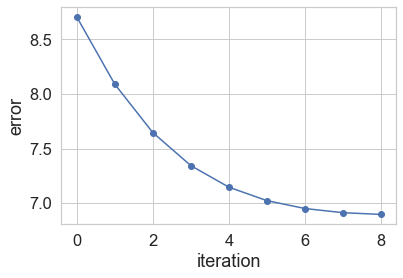

In [102]:
theta = npa([1.,1.])
gradient_descent(gradient_logistic, nll, theta, .2, D, .01, 50)

,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.731059,0.268941
2,"[1, 1]",-1,0.119203,0.880797
3,"[1, 1]",-1,0.119203,0.880797
4,"[1, 0]",-1,0.268941,0.731059
5,"[1, 1]",1,0.880797,0.119203
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.268941,0.731059




iteration 1
gradient= [1.10450839 0.37344981]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.529066,0.470934
2,"[1, 1]",-1,0.306266,0.693734
3,"[1, 1]",-1,0.306266,0.693734
4,"[1, 0]",-1,0.470934,0.529066
5,"[1, 1]",1,0.693734,0.306266
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.331537,0.668463


old error=8.70686   new error=6.61226  theta=[0.11639329 0.70124015]




iteration 2
gradient= [ 0.13933229 -0.25033607]


,x,y,prediction,error
0,"[0, 0]",-1,0.500000,0.500000
1,"[1, 0]",1,0.501232,0.498768
2,"[1, 1]",-1,0.287730,0.712270
3,"[1, 1]",-1,0.287730,0.712270
4,"[1, 0]",-1,0.498768,0.501232
5,"[1, 1]",1,0.712270,0.287730
6,"[0, 0]",1,0.500000,0.500000
7,"[0, 1]",-1,0.288740,0.711260


old error=6.61226   new error=6.84559  theta=[0.00492745 0.901509  ]


error got worse


,theta,gradient,error
0,"[1.0, 1.0]","[1.1045083911936566, 0.37344981256365184]",8.706863
1,"[0.11639328704507468, 0.7012401499490786]","[0.1393322923526068, -0.25033606696510746]",6.612257


array([0.00492745, 0.901509  ])

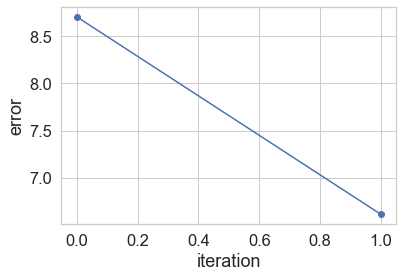

In [103]:
# What if learning rate too big?
theta = npa([1.,1.])
gradient_descent(gradient_logistic, nll, theta, .8, D, .01, 50)
# We stop too early!